In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt
import scipy.stats

In [17]:
df = pd.read_csv('data/Landers_ANSS.csv', skiprows=1, names=['year', 'time', 'lat', 'lon'
                                                  ,'depth', 'mag', 'MagType',
       'NbStations', 'Gap', 'Distance', 'RMS', 'Source', 'EventID'], delim_whitespace=True)

eq = {'coordinates':(-116.52, 34.19), 'time':pd.to_datetime('1992-06-28 11:57:39')
     ,'magnitude':7.3}

def rupture_length(magnitude):
    """
     $L(m) = 0.01 \times 10^{0.5m}$ (km) 
    """
    return 0.01 * 10 ** (0.5 * magnitude)

In [18]:
RL = rupture_length(7.3)
RL

44.66835921509631

In [19]:
df.describe()

,lat,lon,depth,mag,NbStations,Gap,RMS,EventID
count,120687.000000,120687.000000,120687.000000,120687.000000,120687.000000,120687.000000,1.206870e+05,0.0
mean,34.137748,-116.984360,6.650872,1.597416,17.428091,0.143531,9.001816e+07,NaN
std,1.010336,0.923068,4.353456,0.605595,11.614134,1.343527,4.205733e+09,NaN
min,32.500000,-119.000000,-2.000000,0.500000,0.000000,0.000000,0.000000e+00,NaN
25%,33.308000,-117.746000,3.640000,1.100000,10.000000,0.080000,1.134545e+05,NaN
50%,33.968000,-116.740000,5.660000,1.540000,14.000000,0.130000,6.404280e+05,NaN
75%,35.047600,-116.302000,9.535000,2.000000,21.000000,0.180000,1.051150e+06,NaN
max,36.000000,-114.030000,24.840000,6.600000,187.000000,334.000000,1.992051e+11,NaN


In [20]:
df = df.drop(df[df.time.str.contains(':60')].index)

In [21]:
df.timestamp = df.year.str.replace('/', '-')
df.timestamp = df.timestamp + ' ' + df.time

In [22]:
df.timestamp = pd.to_datetime(df.timestamp)

In [23]:
df.set_index(df.timestamp, inplace=True)
df['timestamp'] = df.index

In [24]:
df.describe()

,lat,lon,depth,mag,NbStations,Gap,RMS,EventID
count,120679.000000,120679.000000,120679.000000,120679.000000,120679.000000,120679.000000,1.206790e+05,0.0
mean,34.137746,-116.984361,6.651068,1.597406,17.428285,0.143534,9.002408e+07,NaN
std,1.010333,0.923078,4.353357,0.605606,11.614207,1.343572,4.205872e+09,NaN
min,32.500000,-119.000000,-2.000000,0.500000,0.000000,0.000000,0.000000e+00,NaN
25%,33.308000,-117.746000,3.640000,1.100000,10.000000,0.080000,1.134600e+05,NaN
50%,33.968000,-116.740000,5.660000,1.540000,14.000000,0.130000,6.404300e+05,NaN
75%,35.047600,-116.302000,9.540000,2.000000,21.000000,0.180000,1.051150e+06,NaN
max,36.000000,-114.030000,24.840000,6.600000,187.000000,334.000000,1.992051e+11,NaN


In [25]:
df.dtypes

year                  object
time                  object
lat                  float64
lon                  float64
depth                float64
mag                  float64
MagType               object
NbStations             int64
Gap                  float64
Distance              object
RMS                  float64
Source                object
EventID              float64
timestamp     datetime64[ns]
dtype: object

(<matplotlib.figure.Figure at 0x7ff3301bc320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3301c0160>)

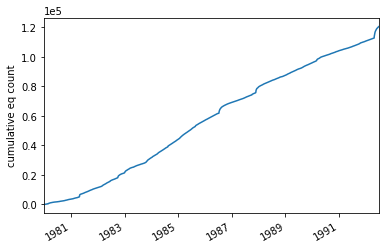

In [26]:
fig, ax = plt.subplots()
plotting.plot_seismicity_rate(df, fig, ax)

(<matplotlib.figure.Figure at 0x7ff3301c8198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff331c45c18>)

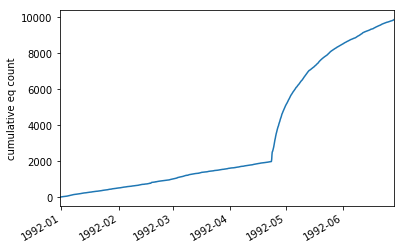

In [27]:
fig, ax = plt.subplots()
plotting.plot_seismicity_rate(df.loc[df.index > '12-31-1991'], fig, ax)

(<mpl_toolkits.basemap.Basemap at 0x7ff33192e5c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff32fb99f98>)

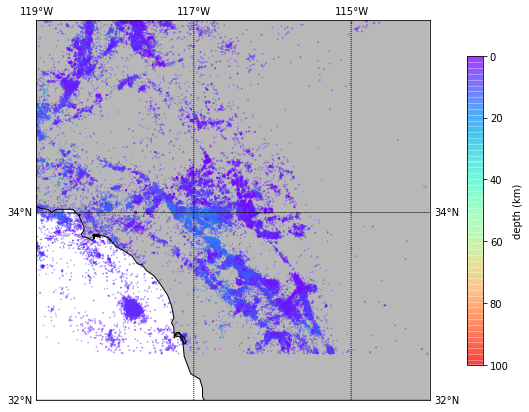

In [28]:
plotting.plot_seismicity_map(df)

In [29]:
df.mag.max()

6.5999999999999996

In [33]:
df_regional = df.copy()
# df_regional = df_regional[df_regional.timestamp < '2004-09-28 17:15:24.250'].copy()
df_regional = polygon_selection.get_node_data(data=df_regional, node=eq['coordinates'], radius=2*RL, m=1)
df_regional['horizontal_error'] = 0
df_regional.count()

df_regional.count()

year                45262
time                45262
lat                 45262
lon                 45262
depth               45262
mag                 45262
MagType             45262
NbStations          45262
Gap                 45262
Distance            45262
RMS                 45262
Source                 50
EventID                 0
timestamp           45262
distance            45262
horizontal_error    45262
dtype: int64

year                2193
time                2193
lat                 2193
lon                 2193
depth               2193
mag                 2193
MagType             2193
NbStations          2193
Gap                 2193
Distance            2193
RMS                 2193
Source                 3
EventID                0
timestamp           2193
distance            2193
horizontal_error    2193
dtype: int64

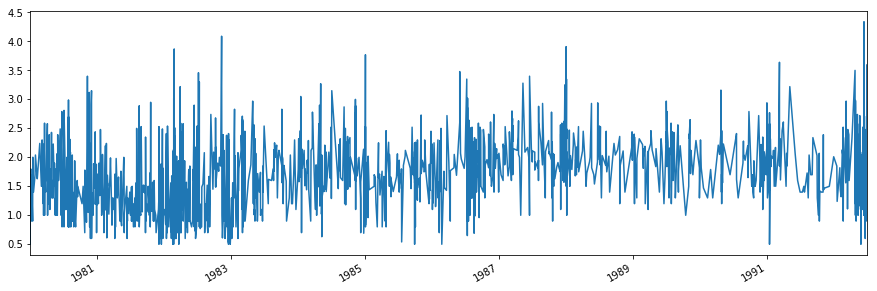

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
df_regional[df_regional.distance <= 20].mag.plot(ax=ax)
df_regional.sort_values(by='mag').tail()
df_regional[df_regional.distance <= 20].count()

(<mpl_toolkits.basemap.Basemap at 0x7ff332282048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff331808e80>)

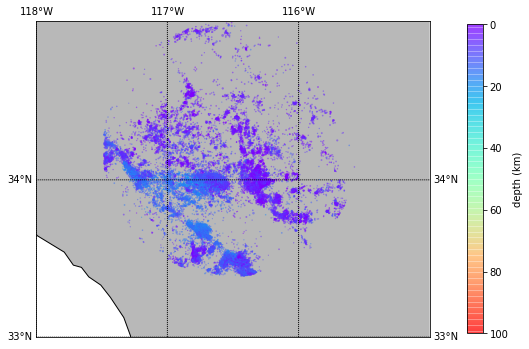

In [35]:
plotting.plot_seismicity_map(df_regional)

In [36]:
def kstest_for_earthquake_distributions(params):
    r1, r2, t1, t2 = params
    df_small = df_regional[df_regional.distance <= r1].copy()
    df_small = df_small.loc[df_small.index >= t1]
    a1, b1, bstd1, n1, mc1 = stats.calc_fmd_stats_with_mc(df_small.mag)
    df_small = df_small[df_small.mag >= mc1].copy()

    df_big = df_regional[df_regional.distance <= r2].copy()
    df_big = df_big.loc[df_big.index >= t2]
    a2, b2, bstd2, n2, mc2 = stats.calc_fmd_stats_with_mc(df_big.mag)
    df_big = df_big[df_big.mag >= mc2].copy()
    
    if df_small.empty is True or df_big.empty is True:
        ks_pvalue = np.nan
        ks_statistic = np.nan
    else:
        ks = scipy.stats.ks_2samp(df_small.mag, df_big.mag)
        ks_pvalue = ks.pvalue
        ks_statistic = ks.statistic
        
    return np.array([int(r1), int(r2), pd.to_datetime(t1), pd.to_datetime(t2)
#                            , float(ks.statistic), float(ks.pvalue)
                           , float(ks_statistic), float(ks_pvalue)
                          ,float(a1), float(b1), float(bstd1), float(n1), float(mc1)
                          , float(a2), float(b2), float(bstd2), float(n2), float(mc2)])


def shape_for_scatter_plot(bdf):
    bdf = bdf.copy()
    bdf['years before'] = bdf['start_time'].values.astype('datetime64[Y]').astype(int) - 20
    return bdf



In [37]:

def calc_fmd_for_params(params):
    r, t = params
    df_local = df_regional[df_regional.distance <= r]
    df_local = df_local.loc[df_local.index >= t]
    a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_local.mag)
    return r, t, a, b, bstd, n, mc

In [38]:
from multiprocessing import Pool
pool = Pool()

# rupture_length = 0.01 * 10 ** (0.5 * eq['magnitude'])

radii = np.arange(5, (RL * 2) + 1, 1)
timii = pd.date_range(start='01-01-1980', end=eq['time'], freq='1M')
parameters = [x for x in product(radii, timii)]
results = pool.map(calc_fmd_for_params, parameters)
pool.close()

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])


In [39]:
bdf = pd.DataFrame(results, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc'])

In [40]:
bdf.tail()

,radius,start_time,a,b,bstd,n,mc
12809,90.0,1992-01-31,4.948036,0.788073,0.009908,4058.0,1.7
12810,90.0,1992-02-29,4.936207,0.785432,0.009976,3990.0,1.7
12811,90.0,1992-03-31,4.920079,0.781053,0.009996,3911.0,1.7
12812,90.0,1992-04-30,4.851530,0.940541,0.019422,1789.0,1.7
12813,90.0,1992-05-31,4.049400,0.844141,0.026926,607.0,1.5


In [41]:
def shape_for_scatter_plot(bdf, eq_year):
    bdf = bdf.copy()
    bdf['years before'] = abs(bdf['start_time'].values.astype('datetime64[Y]').astype(int) - (eq_year - 1970))
    return bdf


In [42]:
bdf = shape_for_scatter_plot(bdf, eq_year=1992)

In [43]:
bdf.describe()

,radius,a,b,bstd,n,mc,years before
count,12814.000000,12746.000000,12746.000000,12741.000000,12746.000000,12746.000000,12814.000000
mean,47.500000,5.273079,0.990428,0.048229,4804.553193,1.929379,6.281879
std,24.825352,0.872929,0.304646,0.176423,3569.853332,0.205908,3.589985
min,5.000000,1.706257,0.548543,0.005973,1.000000,1.100000,0.000000
25%,26.000000,4.916531,0.815886,0.009313,1492.000000,1.700000,3.000000
50%,47.500000,5.235873,1.027639,0.011034,4712.500000,2.000000,6.000000
75%,69.000000,5.910166,1.062255,0.020548,7045.000000,2.100000,9.000000
max,90.000000,21.367289,8.685890,2.169035,15084.000000,3.100000,12.000000


/home/max/anaconda2/envs/research/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


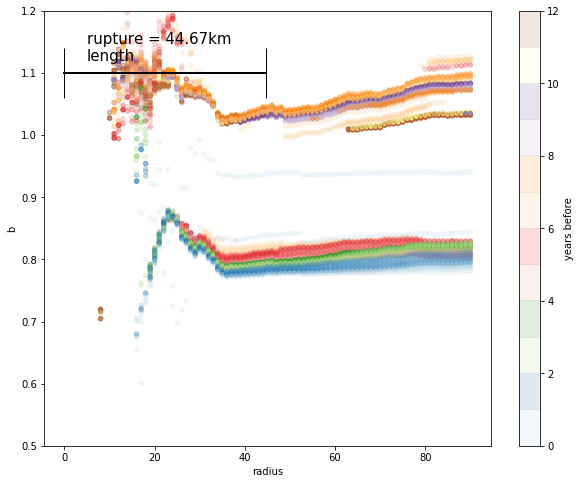

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
data = bdf[bdf.n >= 50].copy()
data.plot(kind='scatter', x='radius', y='b', c='years before'
                        , ax=ax, cmap='Paired', vmin=0, vmax=12
                        , alpha=0.15)
ax.set_ylim(0.5, 1.2)

# lreg = scipy.stats.linregress(data[data.radius <= rupture_length].radius, data[data.radius <= rupture_length].b)
# x = np.arange(4.5, RL+1, 0.5)
# y = lreg.intercept + lreg.slope * x
# ax.plot(x, y, color='red', linewidth=4, label='r={r}, p<<0.001'.format(r=lreg.rvalue.round(2)))
ax.legend(fontsize=15)

ax.plot([0, RL],[1.1, 1.1], marker='|', markersize=50
       , color='black', linewidth=2)

ax.text(s='rupture = {z}km\nlength'.format(z=round(RL,2)), x=5, y=1.12, fontsize=15)


# ax.set_xlim(4, 21)



# ax.text(s='2004 Parkfield M6.0', x=11, y=0.51, fontsize=25)


# fig.savefig('/home/max/Dropbox/Saves/v0003/radius_vs_b_parkfield.pdf', bbox_inches='tight')

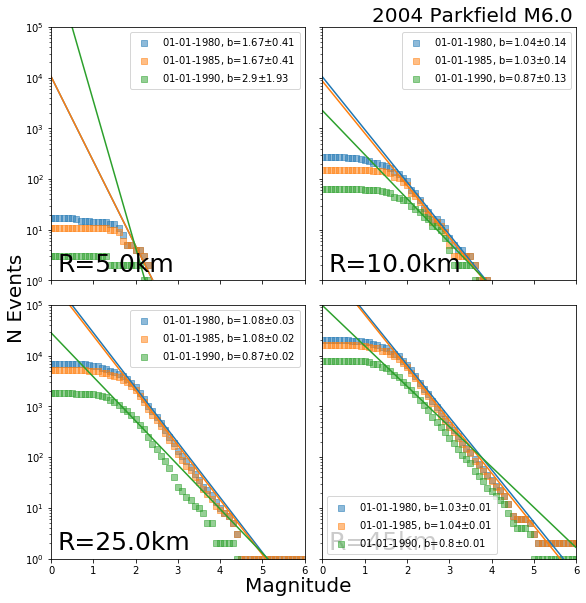

In [56]:
# radius 5
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True, sharex=True)

# [item for sublist in l for item in sublist]

ax = [x for sublist in ax for x in sublist]

radii = [5., 10., 25., 45]
time = ['01-01-1980', '01-01-1985', '01-01-1990']

# t = time[0]
# for axis in ax:
for axis, r in zip(ax, radii):
#     print(r)
    for t in time:
        df_hist = df_regional[df_regional.distance <= r]
        df_hist = df_hist.loc[df_hist.index >= t]
        hist, edges = np.histogram(a=df_hist.mag.values, bins=100, range=(0, 10))
        chist = np.cumsum(hist[::-1])[::-1]


        a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_hist.mag)
        label = r'{t}, b={b}'.format(t=t, b=round(b, 2))+r'$\pm$'+r'{berr}'.format(berr=round(bstd, 2))
        axis.scatter(edges[:-1], chist, marker='s'
                     , label=label
                     ,alpha=0.5)

        x = np.arange(0, 6, 0.01)
        y = 10**(a - b * x)
        axis.plot(x, y)
#     axis.set_title('radius={r}km'.format(r=r))

    axis.set_yscale('log')
    axis.set_ylim(1e0, 1e5)
    axis.set_xlim(0, 6)
    axis.legend()
    
    axis.text(s='R={r}km'.format(r=r), x=0.15, y=1.5e0, fontsize=25)

# ax[4].set_xlabel('Magnitude', fontsize=20)

fig.text(-0.0125, 0.5, 'N Events', va='center', rotation='vertical', fontsize=20)
fig.text(0.4, 0.0, 'Magnitude', va='center', rotation='horizontal', fontsize=20)
fig.text(0.62, 0.98, '2004 Parkfield M6.0', fontsize=20)



fig.tight_layout()


# fig.savefig('/home/max/Dropbox/Saves/v0003/GR_plots_parkfield.pdf', bbox_inches='tight')

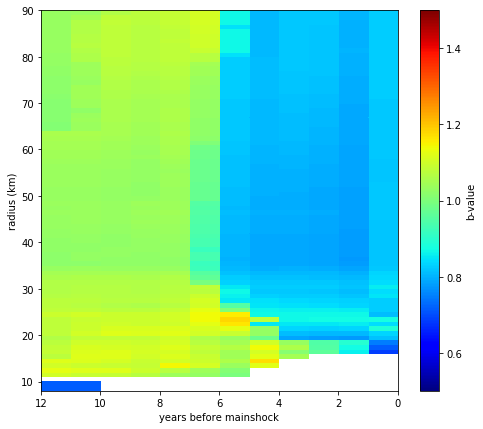

In [61]:
fig, ax = plt.subplots(figsize=(8, 7))

zi = bdf[bdf.n >= 50].pivot_table(index='radius', columns='years before', values='b')
xi = zi.columns
yi = zi.index
x, y = np.meshgrid(xi, yi)
zi = np.ma.masked_invalid(zi)

cbar = ax.pcolormesh(x, y, zi, cmap='jet', vmin=0.5, vmax=1.5)
fig.colorbar(cbar, label='b-value')

ax.set_ylabel('radius (km)')
ax.set_xlabel('years before mainshock')
ax.invert_xaxis()

In [58]:
from scipy.stats import linregress
def rupture_length(magnitude):
    """
     $L(m) = 0.01 \times 10^{0.5m}$ (km) 
    """
    return 0.01 * 10 ** (0.5 * magnitude)

def calculate_b_for_r_time_window(params):
    r, timewindow, half_window_size = params
    df_window = df_regional[df_regional.distance <= r].sort_index()
    time_window_ix = df_window.index.get_loc(timewindow, method='pad')
    
    lower_ix = time_window_ix - half_window_size
    if lower_ix < 0: lower_ix = 0
    upper_ix = time_window_ix + half_window_size
    
    df_window = df_window.iloc[lower_ix : upper_ix]
    a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_window.mag)
    return r, timewindow, half_window_size, a, b, bstd, n, mc

In [59]:
radii = np.arange(5, 2. * rupture_length(6.0))
timii = pd.date_range('01-01-1980', eq['time'], freq='2m')
half_window_sizes = [50, 125, 250, 500]

parameters = [x for x in product(*[radii, timii, half_window_sizes])]
len(parameters)

4500

In [60]:
from multiprocessing import Pool
pool = Pool()


# radii = np.arange(5, (rupture_length * 1.5) + 1, 1)
# timii = pd.date_range(start='01-01-1990', end=eq['time'], freq='1M')
# parameters = [x for x in product(radii, timii)]

results = pool.map(calculate_b_for_r_time_window, parameters)
pool.close()

KeyError: Timestamp('1980-01-31 00:00:00')

In [58]:
bt_df = pd.DataFrame(results, columns=['r', 't', 'half_window', 'a', 'b', 'bstd', 'n', 'mc'])

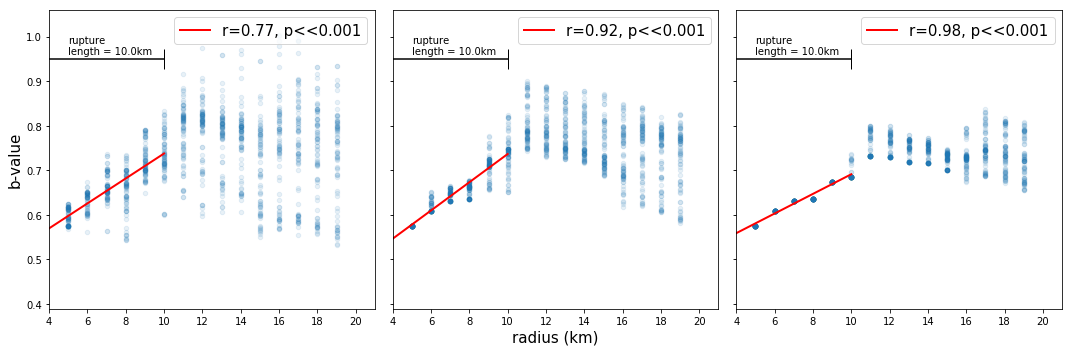

In [69]:
# fig, ax = plt.subplots()
RL = rupture_length(6.)

data = bt_df[bt_df.n >= 50]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

data[data.half_window==125].plot(kind='scatter', x='r', y='b', alpha=0.1, ax=axes[0])
data[data.half_window==250].plot(kind='scatter', x='r', y='b', alpha=0.1, ax=axes[1])
data[data.half_window==500].plot(kind='scatter', x='r', y='b', alpha=0.1, ax=axes[2])

for ax in axes:
    ax.plot( [0, RL],[0.95, 0.95], marker='|', markersize=20, color='black')
    ax.text(s='rupture\nlength = {r}km'.format(r=round(RL,2)), x=5, y=0.96)

axes[0].set_ylabel('b-value', fontsize=15)
axes[0].set_xlabel('')
axes[1].set_xlabel('radius (km)', fontsize=15)
axes[2].set_xlabel('')

x = 68
y = 1.62
# axes[0].text(s=r'$N_{EQ}=250$', x=x, y=y, fontsize=15)
# axes[1].text(s=r'$N_{EQ}=500$', x=x, y=y, fontsize=15)
# axes[2].text(s=r'$N_{EQ}=1000$', x=x, y=y, fontsize=15)

def LR_here(windowsize, ax):
    LR_data = data[(data.half_window==windowsize) & (data.r <= RL)]
    LR = linregress(LR_data.r, LR_data.b)
    x = np.arange(0, RL+1, 1)
    y = LR.intercept + LR.slope * x
    ax.plot(x, y, color='red', linewidth=2, label='r={r}, p<<0.001'.format(r=LR.rvalue.round(2)))
    ax.legend(loc='upper right', fontsize=15)
    
LR_here(125, axes[0])
LR_here(250, axes[1])
LR_here(500, axes[2])

axes[0].set_xlim(4, 21)


fig.tight_layout()

fig.savefig('/home/max/Dropbox/Saves/v0003/b_over_t_vs_r_parkfield.pdf', bbox_inches='tight', dpi=300)

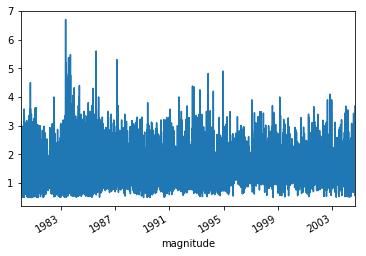

In [34]:
# ax= df_regional.mag.plot()
# ax.set_xlabel('magnitude')